<a href="https://colab.research.google.com/github/EvGdk/Machine-Learning-HSE/blob/master/Yargy_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задача: извлечь из датасета с отзывами туристов все  упоминания денег - сумм и валют.

In [15]:
!pip install ipymarkup==0.5.0 
!pip install yargy

In [0]:
from ipymarkup import show_box_markup
from ipymarkup.palette import palette, RED, GREEN
from ipymarkup import show_markup
from yargy.interpretation import fact, attribute
from yargy.pipelines import morph_pipeline
from IPython.display import display
from yargy.predicates import (
    eq, in_, dictionary,
    type, gram, normalized)
from yargy import Parser, rule, and_, or_

In [0]:
from google.colab import files
files.upload()

In [0]:
file = open("tetuan3.txt", "r")

In [0]:
text=file.read()

In [0]:
Measure = fact(
    "Measure", ["amount", "currency"]
)

CURRENCY = morph_pipeline(['доллар', '$', 'dh', 'рубль','цент','дирхам','евро', 'копейка']).interpretation(Measure.currency)
INT = rule(type('INT'))
FLOAT = rule(INT, in_(',.'), INT)
DIGIT = or_(INT, FLOAT)

RANGE = rule(eq('от'), DIGIT, eq('до'), DIGIT)
RANGE2 = rule(DIGIT, in_('-,'), DIGIT)
VARIANCE = rule(DIGIT, eq('или'), DIGIT)


AMOUNT = rule(in_('выше около примерно более менее где-то меньше').optional(), 
              or_(DIGIT,VARIANCE,RANGE2, RANGE)).interpretation(Measure.amount)



measure = rule(AMOUNT, CURRENCY).interpretation(Measure)
parser = Parser(measure)


In [23]:
matches = list(parser.findall(text))
spans = [_.span for _ in matches] 
show_markup(text, spans)

BoxMarkup('\nИз Парижа в Марракеш я прилетел с отравлением. Ещё в самолёте мне стало плохо, но я сдержал рвотные порывы и изначально подумал, что всё дело в перелёте. Пошатываясь, я дошёл до здания аэропорта, подошёл к пограничному контролю. Молодой пограничник попросил меня заполнить бумагу. В ней я указал и свою профессию – журналист.\n- О! Журналист! По работе или просто отдыхать?\n- Отдыхать.\n- Первый раз в Марокко и один?\n- Да.\n- Точно не по работе? – вопросы сопровождались лёгкой улыбкой.\n- Отдыхать, - я тоже улыбнулся.\nПолучил свой штамп в паспорте и прошёл дальше. Первое что бросилось в глаза – блеск натёртых полов аэропорта и человек 5 уборщиков со швабрами, которые, как мне показалось, ходят там весь день без остановки и трут, трут – позже я узнал, откуда такое усердие.\nКупив за свои доллары марокканских дирхамов (обменял всего 100$ = 800 Dh, подумав, что хватит), я уселся на мягкий диванчик. Всё ещё надеялся, что слабость временная и скоро пройдёт. Но прошло полчаса, или час, а мне становилось только хуже. Тогда я поднялся и вышел на улицу. В голове был единственный вопрос: «Какого хрена я тут делаю один?» Подошёл к таксистам и стал спрашивать цены. 200 Dh.\n- Тебе куда?\n- В отель. Любой.\n- Ну, хоть по цене какой?\n- Не дорогой.\n- Поехали.\n- Подождите, - сказал я и, чуть не упав, сел и спрятал голову в руках.\n- Это официальная цена. Дешевле? Ну, хорошо, ну, 150 Dh.\n- Подождите, мне плохо, - вокруг уже собралась толпа таксистов.\n- Ты откуда?\n- Из России.\n- Первый раз в Марокко?\n- Да.\nНа улице было уже совсем темно. Таксист привёз меня к отелю. Цена оказалась не маленькой – 450 Dh за ночь, но мне было пофигу, я уже ничего не соображал и еле стоял на ногах. Я дал 500, но сдачу мне не вернули, проводили в номер, помогли донести рюкзак. Когда дверь закрылась, я упал на кровать лицом вниз, поджал под себя руки и долго лежал, пытаясь хоть как-то успокоить дрожь. Было очень холодно.\nСпустя некоторое время я нашёл в себе силы переместиться под одеяла, но ненадолго. Организм потребовал свободы от всего съеденного и выпитого. Проблевавшись, я снова забрался в одежде под одеяла, где на некоторое время уснул.\nНочь я так и провел, пытаясь согреться и бегая к унитазу. Ко всему прочему добавилась ещё одна проблема – закончилась питьевая вода. Помню как уже утром я, помня о «грязной африканской воде», вытряхивал из двух маленьких бутылочек последние капли.\nК 11 утра я спустился в холл и по-английски спросил, где могу что-нибудь съесть. Женщина английского не знала, но догадалась – отправила меня на завтрак. Сладкие булочки, чай, мандарины… Я выпил 5 чашек чаю и съел булку. В это же время в окне наблюдал какую-то, кажется студенческую, демонстрацию. После завтрака я ещё нашёл в отеле интернет и оплатил час (10 Dh). Но хватило меня минут на 10 – написать пост в жж…\nВ номере я снова сходил к белому другу и отдал ему завтрак. После залез под одеяло. В 12 постучали в дверь – предложили уборку. Я смог ответить только «No» и улыбнуться. Потом позвонил телефон. Спрашивали по-французски, но я догадался и ответил «Да. Yes, ещё ночь»…\nУтром второго дня надо было оплатить прошедшую ночь, у меня были только доллары и мне их поменяли по курсу 100$ = 750 Dh. Я собрал вещи и вышел из отеля в сторону старой части города.\nТам меня довольно быстро подцепил «хэлпер» и «помог» найти гостиницу за 300 Dh.\nПотом он же отвёл меня в ресторан, где я смог заказать комплексный обед за 180 Dh. Зачем – я так и не понял, т.к. практически ничего не съел. Хэлпер попросил дать ему 100 Dh за помощь, но тут я уже не выдержал и затрещал про «бедный студент из России». Дал 20.\nВечером прогулялся по улочкам Марракеша и по его главному символу – центральной площади. От запахов мне становилось ещё хуже. Заклинатели змей, продавцы фрешей, бой барабанов, маленькие попрошайки, акробаты, разносчики воды, факиры – всё казалось слишком агрессивным в тот момент.\nЯ вернулся в гостиницу. Я хотел принять душ, но лампа (дневного света, трубка такая) перегорел

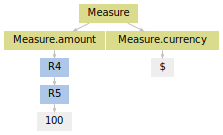

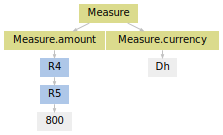

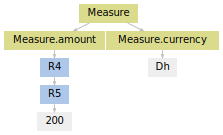

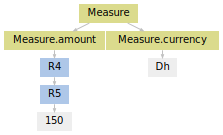

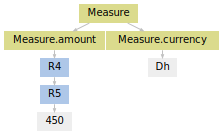

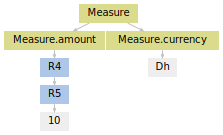

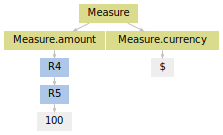

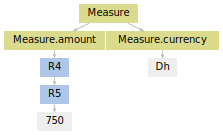

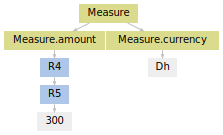

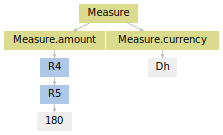

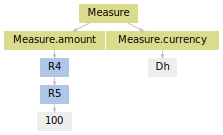

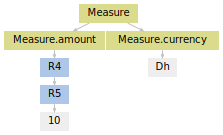

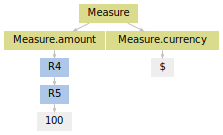

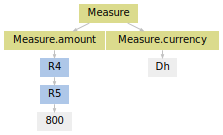

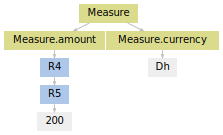

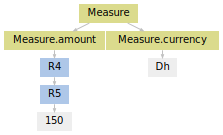

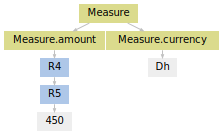

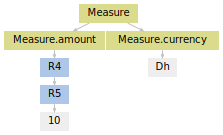

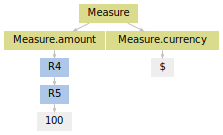

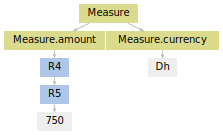

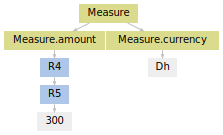

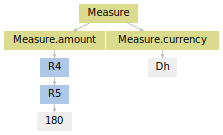

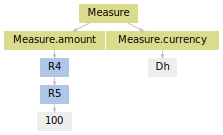

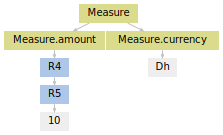

In [24]:
for match in matches:
    display(match.tree.as_dot)